In [15]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

RGB to HSV

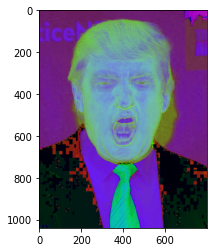

In [9]:
def show_RGB_to_HSV(image):
    img_HSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    plt.imshow(img_HSV)
    plt.show()

img = cv2.imread("blob_images/donald.jpg")
show_RGB_to_HSV(img)

METHOD 1: <br>
RGB to HSV <br>
FIND contours <br>
PLOT rectangle

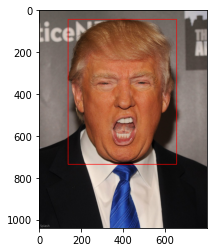

In [10]:
def multiple_rects(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # get the orange range
    orange = cv2.inRange(hsv,(0, 100, 20), (25, 200, 255))

    # # erode and then dilate
    # kernel = np.ones((5, 5))
    # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # blur
    orange = cv2.medianBlur(orange, 5)

    # create result image
    result = image.copy()

    # find contours in orange image 
    contours = cv2.findContours(orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    # per contour create a rectangle
    for cntr in contours:
        # rectangle size
        x,y,w,h = cv2.boundingRect(cntr)
        
        # check for minimum size
        if np.abs(y-x) > 2 and np.abs(h-w) > 2:
            # create rectangle
            cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
            # print("x,y,w,h:",x,y,w,h)


    # cv2.imshow("Keypoints", result)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    RGB_result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    # plt.imshow(RGB_result)
    return RGB_result

img = cv2.imread("blob_images/donald.jpg")
plt.imshow(multiple_rects(img))
plt.show()

METHOD 2: <br>
RGB to HSV <br>
FIND contours <br>
store all minimum rectangles <br>
Plot one big rectangle around them 



yeah gelukt


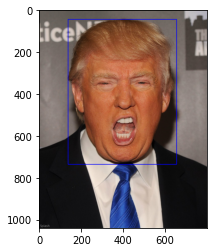

In [16]:
def one_big_rect(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # get the orange range
    # orange = cv2.inRange(hsv,(0, 100, 20), (25, 200, 255))
    orange = cv2.inRange(hsv,(0, 100, 20), (25, 200, 255))

    # # erode and then dilate
    # kernel = np.ones((5, 5))
    # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # blur
    orange = cv2.medianBlur(orange, 5)

    # create result image
    result = image.copy()

    # find contours in orange image 
    contours = cv2.findContours(orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    boxes = []
    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        if w > 10 and h > 10:
            boxes.append([x,y, x+w,y+h])

    result = image.copy()
    boxes = np.asarray(boxes)
    left, top = np.min(boxes, axis=0)[:2]
    right, bottom = np.max(boxes, axis=0)[2:]

    cv2.rectangle(result, (left,top), (right,bottom), (255, 0, 0), 2)

    # radiusToMeters = 960 / 
    # distanceX = radiusToMeters / 0.5
    distanceX = (960/(right-left)) * 60
    distanceX = (960 / (250)) * 60
    # print(distanceX)
    # print(f"x is: {x}")
    # print(f"w is: {w}")
    centerX = (x+(0.5*w))
    # print(f"center: {centerX}")
        

    # cv2.imshow("Keypoints", result)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    # center = (y + 0.5 * h) + (x + 0.5 * w)
    RGB_result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    # plt.imshow(RGB_result)
    return RGB_result, centerX

img = cv2.imread("blob_images/donald.jpg")
print('yeah gelukt')
input, _ = one_big_rect(img)
plt.imshow(input)
plt.show()

In [12]:
def create_2_plots_simple(image_1, image_2):
    plt.imshow(image_1)
    plt.show()
    plt.imshow(image_2)
    plt.show()
    
def create_2_subplots(image_1, image_2):
    fig = plt.figure(figsize=(8, 8))
    columns = 2
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(image_1)
    fig.add_subplot(rows, columns, 2)
    plt.imshow(image_2)
    plt.show()

1: blob_images/blob_cone.jpg


TypeError: Image data of dtype object cannot be converted to float

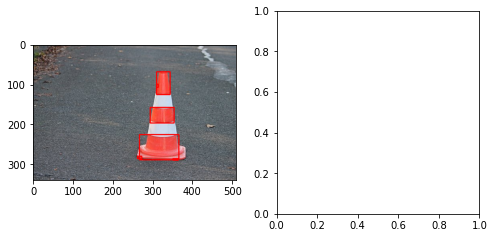

In [13]:
images = ["blob_cone.jpg", "full_orange.jpg", "donald.jpg", "bhv_1.jpg"]
for i, im in enumerate(images):
    print(f"{i+1}: blob_images/{im}")
    im = cv2.imread(f"blob_images/{im}")
    image_1 = multiple_rects(im)
    image_2 = one_big_rect(im)
    create_2_subplots(image_1, image_2)

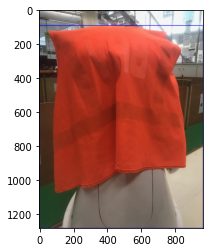

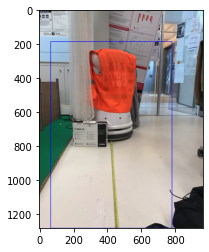

In [ ]:
test_image = cv2.imread("blob_images/bhv_test.jpg")
input1, _ = one_big_rect(test_image)
plt.imshow(input1)
plt.show()

another_test_image = cv2.imread("blob_images/bhv_test2.jpg")
input2, _ = one_big_rect(another_test_image)
plt.imshow(input2)
plt.show()

In [ ]:
def show_video_blob(method):
    cap = cv2.VideoCapture(1)
    # Read until video is completed
    while(cap.isOpened()):
        # Capture frame-by-frame
        ret, frame = cap.read()
        if ret == True:
            # Display the resulting frame
            frame, _ = method(frame)
            cv2.imshow('Frame',frame)
            
            # Press Q on keyboard to  exit
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        # Break the loop
        else:
            break
    # When everything done, release the video capture object
    cap.release()
    # Closes all the frames
    cv2.destroyAllWindows()

In [14]:
# show_video_blob(one_big_rect)

In [ ]:
# show_video_blob(multiple_rects)

In [19]:
import time

def ultra_video_blob(method):
    cap = cv2.VideoCapture(1,cv2.CAP_DSHOW)
    # Read until video is completed
    while(cap.isOpened()):
        # Capture frame-by-frame
        ret, frame = cap.read()
        if ret == True:
            # Display the resulting frame
            frame, centerX = method(frame)
            cv2.imshow('Frame',frame)
            
            # Press Q on keyboard to  exit
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        print(f"Xcenter: {centerX}")
        if centerX < 480:
            print('adjustright')
            time.sleep(0.5)
        elif centerX > 480:
            print('adjustleft')
            time.sleep(0.5)
        # Break the loop
        # else:
            # break
    # When everything done, release the video capture object
    cap.release()
    # Closes all the frames
    cv2.destroyAllWindows()

In [20]:
ultra_video_blob(one_big_rect)

Xcenter: 289.5
adjustright
Xcenter: 339.5
adjustright
Xcenter: 339.0
adjustright
Xcenter: 340.0
adjustright
Xcenter: 343.0
adjustright
Xcenter: 345.0
adjustright
Xcenter: 423.5
adjustright
Xcenter: 462.0
adjustright
Xcenter: 348.0
adjustright
Xcenter: 350.5
adjustright
Xcenter: 350.0
adjustright
Xcenter: 316.0
adjustright
Xcenter: 221.0
adjustright
Xcenter: 213.5
adjustright
Xcenter: 219.5
adjustright
Xcenter: 205.0
adjustright
Xcenter: 201.0
adjustright
Xcenter: 200.5
adjustright
Xcenter: 198.5
adjustright
Xcenter: 195.0
adjustright
Xcenter: 104.0
adjustright
Xcenter: 67.0
adjustright
Xcenter: 43.0
adjustright
Xcenter: 40.0
adjustright
Xcenter: 5.5
adjustright
Xcenter: 485.5
adjustleft
Xcenter: 419.5
adjustright
Xcenter: 411.0
adjustright
Xcenter: 400.0
adjustright
Xcenter: 345.0
adjustright
Xcenter: 251.0
adjustright
Xcenter: 213.0
adjustright
Xcenter: 211.0
adjustright
Xcenter: 210.5
adjustright
Xcenter: 205.5
adjustright
Xcenter: 210.5
adjustright
Xcenter: 163.0
adjustright
Xcenter

KeyboardInterrupt: 